<a href="https://colab.research.google.com/github/josephtrill/CSST101_TRILLANA_BSCS-3A/blob/main/3A_TRILLANA_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise No. 4
### Topic 2.2: Bayesian Networks

### Exercise 1: Setting Up the Environmen

In [1]:
# Install the Required Library:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00


In [3]:
# import Libraries:
import pandas as pd
import numpy as np
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation

### Exercise 2: Building a Simple Bayesian Network

In [5]:
# Define the structure of the Bayesian Network
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Define the Conditional Probability Tables (CPTs)

# CPT for Weather
cpd_weather = TabularCPD(variable='Weather', variable_card=2,
                         values=[[0.7],
                                 [0.3]])

# CPT for Traffic given Weather
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.9, 0.4],
                                 [0.1, 0.6]],
                         evidence=['Weather'], evidence_card=[2])

# CPT for Late given Traffic
cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.8, 0.3],
                              [0.2, 0.7]],
                      evidence=['Traffic'], evidence_card=[2])

# Add the CPTs to the model
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

# Check if the model is valid
assert model.check_model(), "The Bayesian Network model is invalid."

# Perform Inference
inference = VariableElimination(model)

# Query the network for the probability
query_result = inference.query(variables=['Late'], evidence={'Weather': 1})

print(query_result)


+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.5000 |
+---------+-------------+
| Late(1) |      0.5000 |
+---------+-------------+


### Exercise 3: Querying the Bayesian Network

In [6]:
inference = VariableElimination(model)

result = inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.5000 |
+---------+-------------+
| Late(1) |      0.5000 |
+---------+-------------+


### Exercise 4: Parameter Learning

In [14]:
data = pd.DataFrame({
    'Weather' : np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic' : np.nan,
    'Late' : np.nan
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1,  'Traffic'] = np.random.choice(
    [0, 1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

In [17]:
# Estimate the Parameters:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
  print(cpd)

+------------+-------+
| Weather(0) | 0.808 |
+------------+-------+
| Weather(1) | 0.192 |
+------------+-------+
+--------------+---------------------+--------------------+
| Weather      | Weather(0)          | Weather(1)         |
+--------------+---------------------+--------------------+
| Traffic(0.0) | 0.8898514851485149  | 0.5416666666666666 |
+--------------+---------------------+--------------------+
| Traffic(1.0) | 0.11014851485148515 | 0.4583333333333333 |
+--------------+---------------------+--------------------+
+---------+---------------------+--------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)       |
+---------+---------------------+--------------------+
| Late(0) | 0.9404617253948967  | 0.4180790960451977 |
+---------+---------------------+--------------------+
| Late(1) | 0.05953827460510328 | 0.5819209039548022 |
+---------+---------------------+--------------------+


### Exercise 5: Visualizing the Bayesian Network

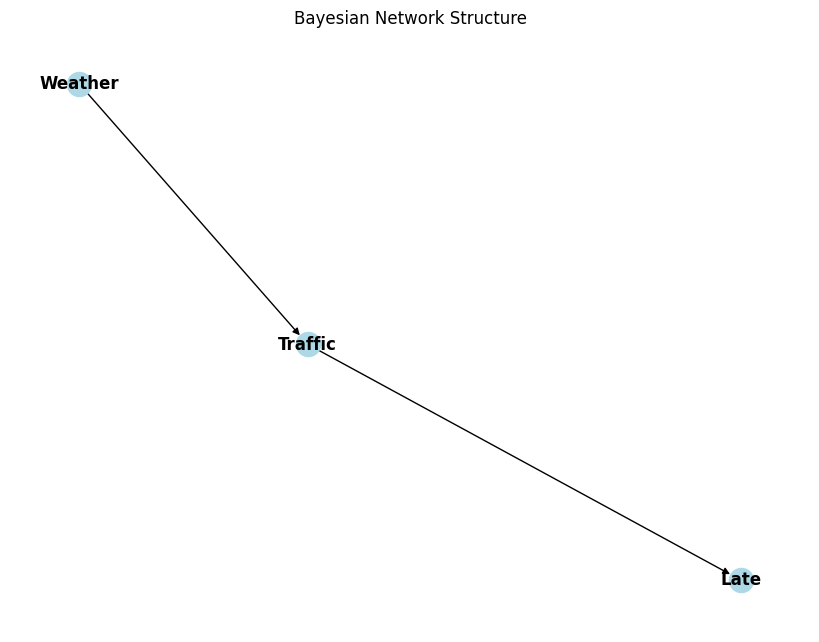

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

nx_graph = nx.DiGraph()

nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos,
    with_labels=True, node_color='lightblue',
    font_weight='bold', arrows=True
)
plt.title('Bayesian Network Structure')
plt.show()
